# Intro

** **

# Table of Contents

<a class="anchor" id="top"></a>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>
    
2. [Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)

    2.1 [Initial Exploration](#2.1-Initial-Exploration)

    2.2 [Incoherencies](#2.2-Incoherencies)
    
    2.3 [Initial Visualisations](#2.3-Initial-Visualisations) <br><br>
    
3. [Data Cleaning & Preprocessing](#3.-Data-Cleaning-&-Preprocessing)


    3.1 [Duplicates](#3.1-Duplicates)
    
    3.2 [Train-Test Split](#3.2-Train-Test-Split)
    
    3.3 [Missing Values](#3.3-Missing-Values)
    
    &emsp; 3.3.1 [Data Type Conversions](#3.3.1-Data-Type-Conversions)
    
    3.4 [Outliers](#3.4-Outliers)
    
    3.5 [Feature Engineering](#3.5-Feature-Engineering)
    
    &emsp; 3.5.1 [Unique Feature-Pair Analysis ](#3.5.1-Unique-Feature-Pair-Analysis)

    3.6 [Visualisations](#3.6-Visualisations) <br><br>
    
    
    --------
    
    
    
    
    
    
    
3. [Export](#3.-Export)


In [72]:
## notebook 1 - preprocessing + EDA
## notebook 2 - modelos



# 1. Importing Libraries & Data

In [73]:
import pandas as pd


# profile report
from ydata_profiling import ProfileReport

# visualisations
import seaborn as sns
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# external functions file
import functions as f


In [74]:
df = pd.read_csv('./project_data/train_data.csv', index_col = 'Claim Identifier')

pd.set_option('display.max_columns', None)
df.head(3)

/var/folders/mm/fxsq_1490x9dd2w76tqvt3kr0000gn/T/ipykernel_81744/3163598516.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./project_data/train_data.csv', index_col = 'Claim Identifier')


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0


# 2. Exploratory Data Analysis

<a href="#top">Top &#129033;</a>

## 2.1 Initial Exploration

In [75]:
# profile = ProfileReport(
#     df, 
#     title='Data',
#     correlations={
#         "pearson": {"calculate": True},
#         "spearman": {"calculate": False},
#         "kendall": {"calculate": False},
#         "phi_k": {"calculate": False},
#         "cramers": {"calculate": False},
#     },
# )

# profile

In [76]:
df.describe(include='object').T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,593471,1096,2020-03-06,1422
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,42.114270,14.256432,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,491.088321,6092.918120,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
IME-4 Count,132803.0,3.207337,2.832303,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,58.645305,19.644175,11.0,45.0,61.0,71.0,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,54.381143,25.874281,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,41.013839,22.207521,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,39.738146,22.365940,-9.0,33.0,38.0,53.0,99.0
Agreement Reached,574026.0,0.046665,0.210921,0.0,0.0,0.0,0.0,1.0


In [78]:
df.shape

(593471, 32)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     

**Correlation matrix**

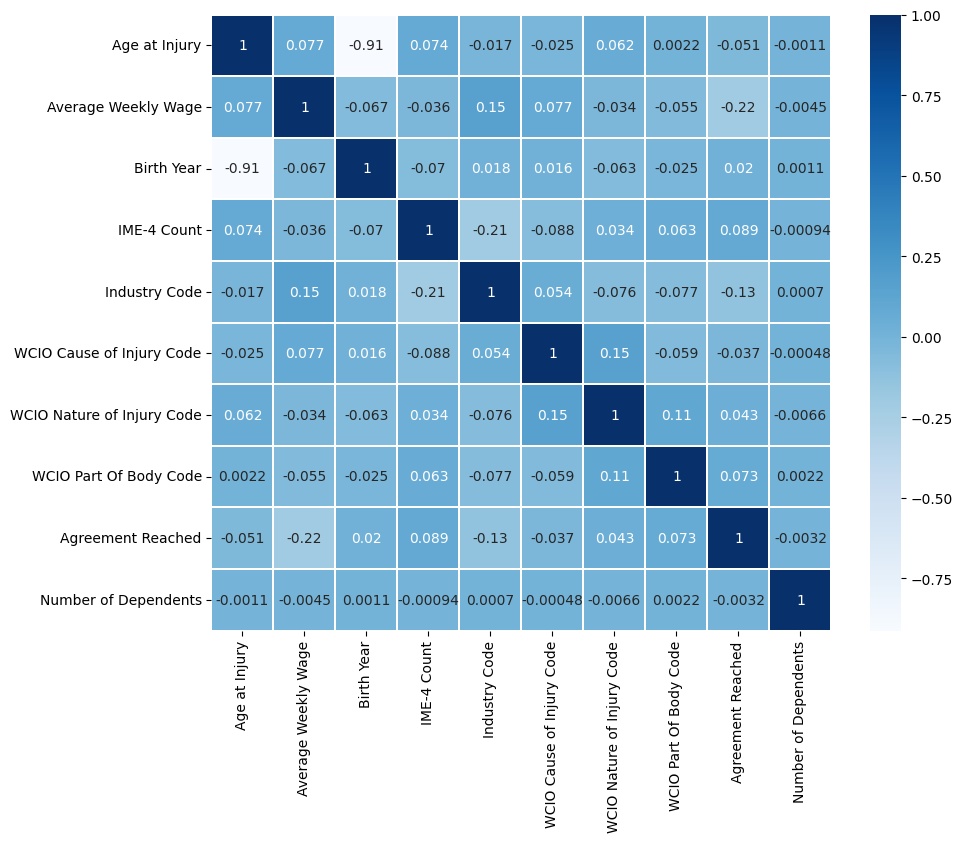

In [80]:
# drop column always missing
temp = df.drop('OIICS Nature of Injury Description', axis = 1)

# drop na
temp2 = temp.dropna()

# select numbers
corr_data = temp2.select_dtypes(include=['number'])

correlation_matrix = corr_data.corr(method='spearman') # pearson by default

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.1)
plt.show()

**Unique Values**

In [81]:
for column in df.columns:
    
    if df[column].nunique() < 20:
        
        print(f"Unique values in '{column}': {df[column].unique()}")
        print(df[column].nunique(), '\n')

Unique values in 'Alternative Dispute Resolution': ['N' nan 'Y' 'U']
3 

Unique values in 'Attorney/Representative': ['N' 'Y' nan]
2 

Unique values in 'Carrier Type': ['1A. PRIVATE' nan '2A. SIF' '4A. SELF PRIVATE' '3A. SELF PUBLIC'
 'UNKNOWN' '5D. SPECIAL FUND - UNKNOWN'
 '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)'
 '5C. SPECIAL FUND - POI CARRIER WCB MENANDS']
8 

Unique values in 'Claim Injury Type': ['2. NON-COMP' '4. TEMPORARY' nan '3. MED ONLY' '5. PPD SCH LOSS'
 '6. PPD NSL' '1. CANCELLED' '8. DEATH' '7. PTD']
8 

Unique values in 'COVID-19 Indicator': ['N' nan 'Y']
2 

Unique values in 'District Name': ['SYRACUSE' 'ROCHESTER' 'ALBANY' nan 'HAUPPAUGE' 'NYC' 'BUFFALO'
 'BINGHAMTON' 'STATEWIDE']
8 

Unique values in 'Gender': ['M' 'F' nan 'U' 'X']
4 

Unique values in 'Medical Fee Region': ['I' 'II' nan 'IV' 'UK' 'III']
5 

Unique values in 'OIICS Nature of Injury Description': [nan]
0 

Unique values in 'Agreement Reached': [ 0.  1. nan]
2 

Unique values in 'WCB Decision': ['

## 2.2 Incoherencies

<a href="#top">Top &#129033;</a>

**Age at Injury**

very high max values

In [82]:
df[df['Age at Injury'] > 100]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5415899,2020-01-24,102.0,N,2020-01-30,N,0.0,1917.0,2020-01-30,NaN,NORTH SYRACUSE CSD,3A. SELF PUBLIC,2. NON-COMP,ONONDAGA,N,SYRACUSE,NaN,F,NaN,61.0,EDUCATIONAL SERVICES,I,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",40.0,LACERATION,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,13031,0.0,Not Work Related,2.0
5424769,2018-08-26,117.0,N,2020-02-10,N,0.0,1901.0,2020-02-10,NaN,AMTRUST INS CO OF KANSAS INC,1A. PRIVATE,2. NON-COMP,KINGS,N,NYC,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),59.0,"ALL OTHER SPECIFIC INJURIES, NOC",65.0,INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...,11218,0.0,Not Work Related,5.0
5432944,2020-02-17,113.0,N,2020-02-19,Y,692.0,1907.0,2020-02-19,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5. PPD SCH LOSS,NIAGARA,N,BUFFALO,NaN,F,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,I,NaN,60.0,"STRAIN OR INJURY BY, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",38.0,SHOULDER(S),NaN,0.0,Not Work Related,5.0
5453673,2020-03-05,104.0,N,2020-03-16,Y,0.0,1916.0,2020-03-16,NaN,ONEIDA COUNTY SELF INS PLAN,3A. SELF PUBLIC,2. NON-COMP,HERKIMER,N,SYRACUSE,NaN,M,NaN,92.0,PUBLIC ADMINISTRATION,II,NaN,56.0,LIFTING,10.0,CONTUSION,52.0,UPPER LEG,13502,0.0,Not Work Related,3.0
5459129,2018-03-22,117.0,N,2020-03-27,N,0.0,1901.0,2020-03-27,NaN,AMTRUST INS CO OF KANSAS INC,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,33.0,MANUFACTURING,IV,NaN,82.0,"ABSORPTION, INGESTION OR INHALATION, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",65.0,INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...,11703,0.0,Not Work Related,2.0
5546365,2016-11-01,115.0,N,2020-08-28,N,0.0,0.0,2020-08-28,NaN,WESCO INSURANCE CO,1A. PRIVATE,1. CANCELLED,ERIE,N,BUFFALO,2020-12-03,F,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,I,NaN,15.0,BROKEN GLASS,40.0,LACERATION,34.0,WRIST,14140,0.0,Not Work Related,5.0
5559268,2020-09-11,110.0,N,2020-09-15,N,0.0,1910.0,2020-09-15,NaN,SAFETY NATIONAL CASUALTY CORP,1A. PRIVATE,2. NON-COMP,ORANGE,N,ALBANY,NaN,F,NaN,45.0,RETAIL TRADE,III,NaN,27.0,FROM LIQUID OR GREASE SPILLS,52.0,STRAIN OR TEAR,53.0,KNEE,10940,0.0,Not Work Related,1.0
5706270,2021-04-21,110.0,N,2021-04-23,N,0.0,1911.0,2021-04-23,NaN,WESCO INSURANCE COMPANY,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,III,NaN,68.0,STATIONARY OBJECT,40.0,LACERATION,18.0,SOFT TISSUE,11946,0.0,Not Work Related,5.0
5804529,2021-07-02,101.0,N,2021-09-03,N,0.0,1920.0,2021-09-03,NaN,CAROLINA CASUALTY INS CO,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,F,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",10.0,CONTUSION,35.0,HAND,11763,0.0,Not Work Related,0.0


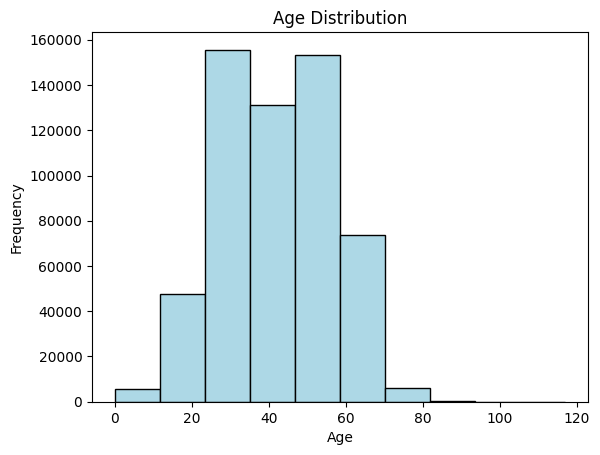

In [83]:
f.plot_histogram(df['Age at Injury'], 'Age', 'Frequency',
                'Age Distribution')

In [84]:
# age 0 at injury while being born a long time before the accident
df[(df['Age at Injury'] == 0) & (df['Birth Year'] != df['Accident Date'])]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393971,2019-06-26,0.0,N,2020-01-02,N,0.0,0.0,NaN,NaN,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,2. NON-COMP,NASSAU,N,NYC,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11801,0.0,Not Work Related,1.0
5394093,2019-12-28,0.0,N,2020-01-02,N,0.0,0.0,2019-12-30,NaN,TWIN CITY FIRE INS CO.,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,M,NaN,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",IV,NaN,55.0,HOLDING OR CARRYING,52.0,STRAIN OR TEAR,61.0,ABDOMEN INCLUDING GROIN,NaN,0.0,Not Work Related,5.0
5394068,NaN,0.0,N,2020-01-02,Y,0.0,1959.0,NaN,2019-12-23,STARR INDEMNITY & LIABILITY CO,1A. PRIVATE,2. NON-COMP,BRONX,N,NYC,NaN,M,NaN,23.0,CONSTRUCTION,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Not Work Related,6.0
5393794,NaN,0.0,N,2020-01-02,Y,0.0,1984.0,NaN,2019-12-27,LM INSURANCE CORP,1A. PRIVATE,2. NON-COMP,ONONDAGA,N,SYRACUSE,NaN,F,NaN,NaN,NaN,II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13212,0.0,Not Work Related,4.0
5393876,2019-12-20,0.0,N,2020-01-02,N,0.0,0.0,2019-12-30,NaN,CARMEL CENTRAL SCHOOL DISTRICT,3A. SELF PUBLIC,2. NON-COMP,PUTNAM,N,ALBANY,NaN,F,NaN,NaN,NaN,III,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",40.0,LACERATION,35.0,HAND,10512,0.0,Not Work Related,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164179,NaN,0.0,N,2022-12-30,Y,0.0,0.0,2023-01-10,2022-12-28,NYC TRANSIT AUTHORITY,3A. SELF PUBLIC,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,48.0,TRANSPORTATION AND WAREHOUSING,UK,NaN,99.0,"OTHER - MISCELLANEOUS, NOC",78.0,CARPAL TUNNEL SYNDROME,-9.0,MULTIPLE,22473,0.0,Not Work Related,3.0
6164933,NaN,0.0,N,2022-12-30,Y,0.0,1972.0,2023-01-20,2022-12-22,LM INSURANCE CORP,1A. PRIVATE,2. NON-COMP,KINGS,N,NYC,NaN,M,NaN,23.0,CONSTRUCTION,IV,NaN,60.0,"STRAIN OR INJURY BY, NOC",78.0,CARPAL TUNNEL SYNDROME,39.0,WRIST (S) & HAND(S),11221,0.0,Not Work Related,6.0
6164931,NaN,0.0,N,2022-12-30,Y,0.0,1957.0,NaN,2022-12-27,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,1. CANCELLED,KINGS,N,NYC,NaN,M,NaN,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11221,0.0,Not Work Related,0.0


**Birth Year**

very Low values for Birth Year, but a LOT of rows with the same issue

In [85]:
df[df['Birth Year'] < 1800]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5394187,2019-12-14,21.0,N,2020-01-01,N,0.0,0.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,M,NaN,51.0,INFORMATION,UK,NaN,75.0,FALLING OR FLYING OBJECT,37.0,INFLAMMATION,53.0,KNEE,07649,0.0,Not Work Related,3.0
5394053,2019-12-18,53.0,N,2020-01-01,N,0.0,0.0,2020-01-01,NaN,TWIN CITY FIRE INS CO.,1A. PRIVATE,2. NON-COMP,WARREN,N,ALBANY,NaN,F,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,I,NaN,5.0,STEAM OR HOT FLUIDS,4.0,BURN,56.0,FOOT,12810,0.0,Not Work Related,4.0
5393827,2019-12-26,21.0,N,2020-01-01,N,0.0,0.0,2020-01-01,NaN,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,III,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",40.0,LACERATION,36.0,FINGER(S),11941,0.0,Not Work Related,3.0
5393885,2019-12-12,57.0,N,2020-01-01,N,0.0,0.0,2019-12-31,NaN,NATIONAL CASUALTY CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,I,NaN,32.0,ON ICE OR SNOW,28.0,FRACTURE,44.0,CHEST,13646,0.0,Not Work Related,2.0
5394008,2019-12-17,42.0,N,2020-01-01,N,0.0,0.0,2019-12-31,2020-04-16,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,F,NaN,51.0,INFORMATION,UK,NaN,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,38.0,SHOULDER(S),NaN,0.0,Not Work Related,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6164729,2022-11-30,44.0,N,2022-12-30,Y,0.0,0.0,2023-01-30,2022-12-27,*** CARRIER UNDETERMINED ***,UNKNOWN,2. NON-COMP,BRONX,N,STATEWIDE,2023-05-19,M,NaN,NaN,NaN,UK,NaN,NaN,NaN,NaN,NaN,-9.0,MULTIPLE,44405,0.0,Not Work Related,6.0
6165113,2022-12-26,22.0,N,2022-12-30,N,0.0,0.0,2022-12-30,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,2. NON-COMP,NEW YORK,N,NYC,NaN,F,NaN,51.0,INFORMATION,UK,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,53.0,KNEE,94603,0.0,Not Work Related,3.0
6165672,2022-12-28,31.0,N,2022-12-30,N,0.0,0.0,2022-12-30,NaN,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,2. NON-COMP,UNKNOWN,N,NYC,NaN,M,NaN,42.0,WHOLESALE TRADE,UK,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,41.0,UPPER BACK AREA,05743,0.0,Not Work Related,1.0


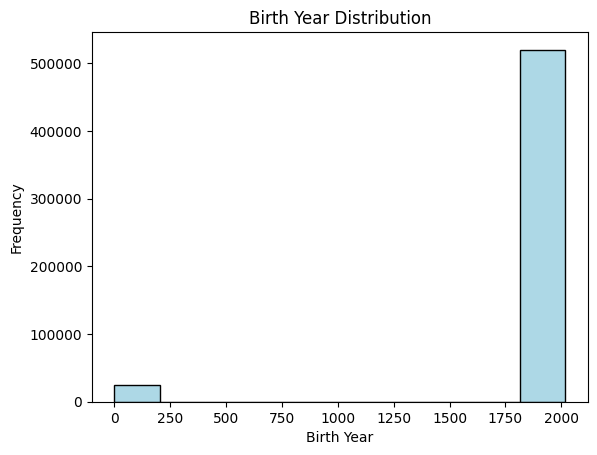

In [86]:
f.plot_histogram(df['Birth Year'], 'Birth Year', 'Frequency',
                'Birth Year Distribution')

**IME-4 Count**

Very High 

In [87]:
df[df['IME-4 Count'] > 30]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5395531,2019-12-26,51.0,N,2020-01-03,Y,1205.08,1968.0,2020-01-03,2020-01-17,A I U INSURANCE COMPANY,1A. PRIVATE,4. TEMPORARY,QUEENS,N,NYC,2020-09-30,M,36.0,42.0,WHOLESALE TRADE,IV,NaN,75.0,FALLING OR FLYING OBJECT,52.0,STRAIN OR TEAR,21.0,VERTEBRAE,11434,0.0,Not Work Related,4.0
5424849,2019-12-09,56.0,N,2020-02-11,Y,250.00,1963.0,2020-02-21,2020-01-30,NEW YORK BLACK CAR OPERATORS',4A. SELF PRIVATE,4. TEMPORARY,SUFFOLK,N,HAUPPAUGE,2020-08-20,M,32.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,49.0,SPRAIN OR TEAR,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,11727,0.0,Not Work Related,1.0
5437678,2020-02-19,24.0,N,2020-02-25,Y,2525.55,1995.0,2020-02-25,2020-03-06,STARR INDEMNITY & LIABILITY,1A. PRIVATE,4. TEMPORARY,SUFFOLK,N,HAUPPAUGE,2020-04-29,M,39.0,23.0,CONSTRUCTION,IV,NaN,30.0,"SLIP, OR TRIP, DID NOT FALL",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,11793,0.0,Not Work Related,2.0
5447387,2020-02-29,53.0,N,2020-03-06,Y,1980.19,1966.0,2020-03-05,2020-05-07,VISITING NURSE SERVICE OF NY,4A. SELF PRIVATE,4. TEMPORARY,NEW YORK,N,NYC,2020-08-27,F,32.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,10025,0.0,Not Work Related,1.0
5448127,2020-02-19,67.0,N,2020-03-10,Y,250.00,1952.0,2020-03-17,2020-02-27,HEREFORD INSURANCE COMPANY,1A. PRIVATE,4. TEMPORARY,QUEENS,N,NYC,2020-11-27,M,47.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,90.0,MULTIPLE PHYSICAL INJURIES ONLY,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,NaN,0.0,Not Work Related,4.0
5490306,2020-03-17,37.0,N,2020-06-01,Y,1502.14,1983.0,2020-06-12,2020-05-26,LIBERTY MUTUAL FIRE INS CO,1A. PRIVATE,4. TEMPORARY,NEW YORK,N,NYC,2021-02-23,M,48.0,33.0,MANUFACTURING,UK,NaN,29.0,ON SAME LEVEL,46.0,RUPTURE,38.0,SHOULDER(S),07105,0.0,Not Work Related,0.0
5491873,2020-06-01,46.0,N,2020-06-02,Y,851.41,1974.0,2020-06-02,2020-06-09,STATE INSURANCE FUND,2A. SIF,4. TEMPORARY,NEW YORK,N,NYC,2020-11-13,F,34.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",52.0,STRAIN OR TEAR,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,10039,0.0,Not Work Related,1.0
5525046,2020-07-13,42.0,N,2020-07-27,Y,1400.00,1977.0,2020-07-27,2020-10-20,STATE INSURANCE FUND,2A. SIF,4. TEMPORARY,NASSAU,N,NYC,2020-10-26,M,36.0,23.0,CONSTRUCTION,IV,NaN,81.0,"STRUCK OR INJURED, NOC",28.0,FRACTURE,55.0,ANKLE,11590,0.0,Not Work Related,1.0
5538883,2020-07-03,52.0,N,2020-08-18,Y,2672.78,NaN,2020-09-25,2020-08-12,STARR INDEMNITY & LIABILITY,1A. PRIVATE,6. PPD NSL,BRONX,N,NYC,2021-01-04,M,34.0,54.0,"PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES",IV,NaN,75.0,FALLING OR FLYING OBJECT,52.0,STRAIN OR TEAR,20.0,MULTIPLE NECK INJURY,10460,0.0,Not Work Related,3.0


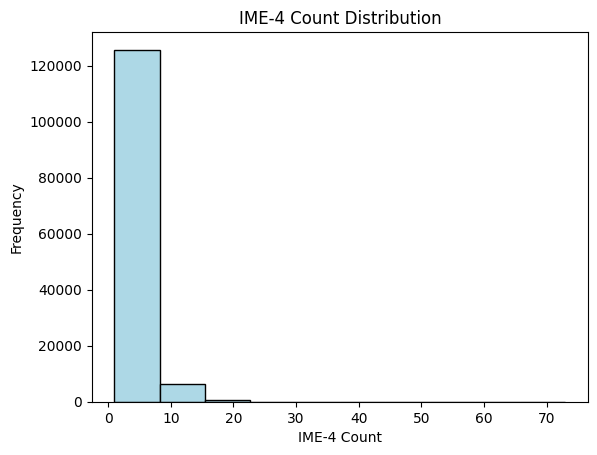

In [88]:
f.plot_histogram(df['IME-4 Count'], 'IME-4 Count', 'Frequency',
                'IME-4 Count Distribution')

**OIICS Nature of Injury Description**

always missing

In [89]:
print(f"Number of missing rows in variable OIICS Nature of Injury Description: {len(df[df['OIICS Nature of Injury Description'].isna()])}")
print(f"Number of Rows in the Dataset: {len(df)}")

Number of missing rows in variable OIICS Nature of Injury Description: 593471
Number of Rows in the Dataset: 593471


**Agreement Reached**

w/ a lot of zeros

In [90]:
df['Agreement Reached'].value_counts()

Agreement Reached
0.0    547239
1.0     26787
Name: count, dtype: int64

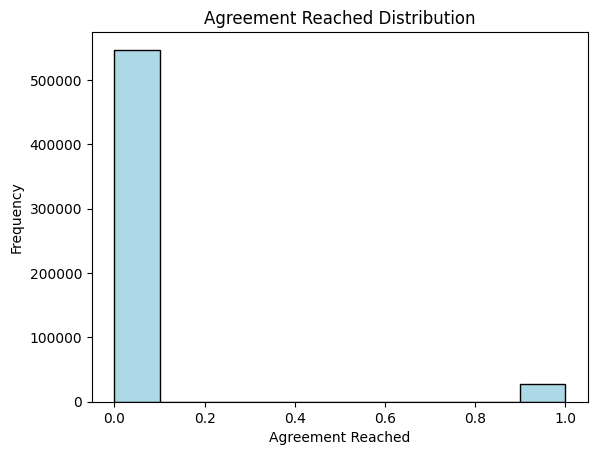

In [91]:
f.plot_histogram(df['Agreement Reached'], 'Agreement Reached', 'Frequency',
                'Agreement Reached Distribution')

**WCB Decision**

always the same

In [92]:
df['WCB Decision'].unique()

array(['Not Work Related', nan], dtype=object)

**Claim Injury Type**

imbalanced target 

In [93]:
df['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

## 2.3 Initial Visualisations

<a href="#top">Top &#129033;</a>

# 3. Data Cleaning & Preprocessing

<a href="#top">Top &#129033;</a>

## 3.1 Duplicates

<a href="#top">Top &#129033;</a>

In [94]:
df[df.duplicated()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
363651794,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209507552,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970865999,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807753247,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395971406,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365870975,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327160035,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249875936,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
len(df[df.duplicated()])

18350

In [96]:
len(df[df.duplicated()]) / len(df) * 100

3.091979220551636

In [97]:
df = df.drop_duplicates()

verify the success

In [98]:
df[df.duplicated()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [99]:
df[df.isna().sum(axis=1) >= 25]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
653337074,NaN,NaN,NaN,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489154817,NaN,NaN,NaN,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351928125,NaN,NaN,NaN,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454184427,NaN,NaN,NaN,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894683610,NaN,NaN,NaN,2022-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
820269517,NaN,NaN,NaN,2022-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
815542773,NaN,NaN,NaN,2022-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


dropping them

In [100]:
df = df[df.isna().sum(axis=1) < 25]

## 3.2 Train-Test Split

<a href="#top">Top &#129033;</a>

In [101]:
X = df.drop('Claim Injury Type', axis = 1)

y = df['Claim Injury Type']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify = y, 
                                                    random_state = 1)

/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In some cases (e.g., when applying cross-validation or using sophisticated imputation methods), it might be better to fit the imputation on the training set only and then apply the same transformation to the test set. But even then, the strategy is first determined on the training data to avoid leakage.

## 3.3 Missing Values

<a href="#top">Top &#129033;</a>

## 3.3.1 Data Type Conversions

even though this is usually feature engineering, it will be useful doing before treating missing values

In [103]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459220 entries, 6054143 to 5626711
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       456242 non-null  object 
 1   Age at Injury                       459220 non-null  float64
 2   Alternative Dispute Resolution      459220 non-null  object 
 3   Assembly Date                       459220 non-null  object 
 4   Attorney/Representative             459220 non-null  object 
 5   Average Weekly Wage                 436350 non-null  float64
 6   Birth Year                          435977 non-null  float64
 7   C-2 Date                            447610 non-null  object 
 8   C-3 Date                            149765 non-null  object 
 9   Carrier Name                        459220 non-null  object 
 10  Carrier Type                        459220 non-null  object 
 11  County of Injury        

In [104]:
X_train['Accident Date'] = pd.to_datetime(X_train['Accident Date'], 
                                     errors='coerce')

X_train['Assembly Date'] = pd.to_datetime(X_train['Assembly Date'], 
                                     errors='coerce')

X_train['C-2 Date'] = pd.to_datetime(X_train['C-2 Date'], 
                                errors='coerce')

X_train['C-3 Date'] = pd.to_datetime(X_train['C-3 Date'], 
                                errors='coerce')

X_train['First Hearing Date'] = pd.to_datetime(X_train['First Hearing Date'], 
                                          errors='coerce')

look for missing values

In [105]:
X_train.isna().sum()


Accident Date                           2978
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                    22870
Birth Year                             23243
C-2 Date                               11610
C-3 Date                              309455
Carrier Name                               0
Carrier Type                               0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    338497
Gender                                     0
IME-4 Count                           353037
Industry Code                           7992
Industry Code Description               7992
Medical Fee Region                         0
OIICS Nature of Injury Description    459220
WCIO Cause of Injury Code              12475
WCIO Cause

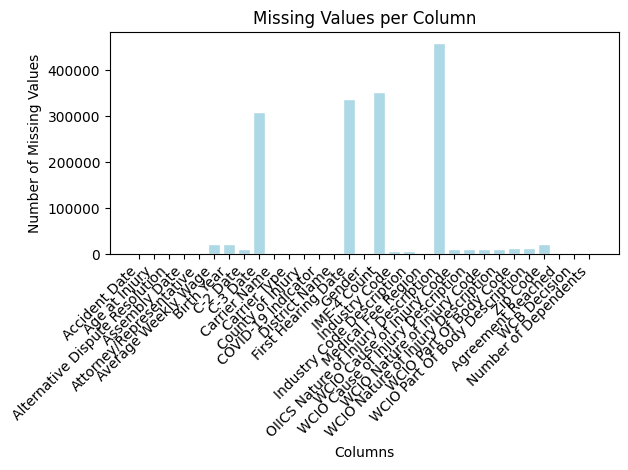

In [106]:
missing_values_per_column = X_train.isna().sum()


f.plot_missing_values_bar(
    data=missing_values_per_column,
    xlabel='Columns',
    ylabel='Number of Missing Values',
    title='Missing Values per Column'
)


same but in percentage

In [107]:
X_train.isna().sum() / len(df) * 100

Accident Date                          0.518793
Age at Injury                          0.000000
Alternative Dispute Resolution         0.000000
Assembly Date                          0.000000
Attorney/Representative                0.000000
Average Weekly Wage                    3.984147
Birth Year                             4.049127
C-2 Date                               2.022560
C-3 Date                              53.909673
Carrier Name                           0.000000
Carrier Type                           0.000000
County of Injury                       0.000000
COVID-19 Indicator                     0.000000
District Name                          0.000000
First Hearing Date                    58.969034
Gender                                 0.000000
IME-4 Count                           61.502025
Industry Code                          1.392274
Industry Code Description              1.392274
Medical Fee Region                     0.000000
OIICS Nature of Injury Description    80

look case by case --> focus on high % of missing first

**C-3 Date**

In [108]:
print(f'There are {len(X_train[X_train["C-3 Date"].isna()])} rows with missing values')
X_train[X_train['C-3 Date'].isna()].head(2)

# var description: Date Form C-3 (Employee Claim Form) was received
## interpretation --> if missing, was not received --> fill w/ 0 ou deixar estar como está (?) --> pode dar problema nas visualisations

There are 309455 rows with missing values


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6054143,2022-07-28,49.0,N,2022-08-04,N,405.0,1973.0,2022-08-04,NaT,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,DUTCHESS,N,ALBANY,NaT,F,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,II,NaN,27.0,FROM LIQUID OR GREASE SPILLS,52.0,STRAIN OR TEAR,33.0,LOWER ARM,12590,0.0,Not Work Related,5.0
5405551,2020-01-06,30.0,N,2020-01-16,N,0.0,1989.0,2020-01-16,NaT,MEMIC CASUALTY COMPANY,1A. PRIVATE,ONONDAGA,N,SYRACUSE,NaT,F,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,13204,0.0,Not Work Related,0.0


In [109]:
# Create a binary variable: 1 if 'C-3 Date' is not missing, 0 if it is missing
X_train['C-3 Date Binary'] = X_train['C-3 Date'].notna().astype(int)

**First Hearing Date**

In [110]:
print(f'There are {len(X_train[X_train["First Hearing Date"].isna()])} rows with missing values')
X_train[X_train['First Hearing Date'].isna()].head(2)

# var meaning --> Date the first hearing was held on a claim at a WCB hearinglocation. A blank date means the claim has not yet had ahearing held
## sol --> fill w/ 0s ou deixar estar como está (?) --> pode dar problema nas visualisations

There are 338497 rows with missing values


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6054143,2022-07-28,49.0,N,2022-08-04,N,405.0,1973.0,2022-08-04,NaT,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,DUTCHESS,N,ALBANY,NaT,F,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,II,NaN,27.0,FROM LIQUID OR GREASE SPILLS,52.0,STRAIN OR TEAR,33.0,LOWER ARM,12590,0.0,Not Work Related,5.0,0
5405551,2020-01-06,30.0,N,2020-01-16,N,0.0,1989.0,2020-01-16,NaT,MEMIC CASUALTY COMPANY,1A. PRIVATE,ONONDAGA,N,SYRACUSE,NaT,F,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,13204,0.0,Not Work Related,0.0,0


In [111]:
# Create a new variable: 0 if 'First Hearing Date' is missing, otherwise extract the year

X_train['First Hearing Year'] = X_train['First Hearing Date'].apply(lambda x: x.year if pd.notna(x) else 0)

**IME-4 Count**

In [112]:
print(f'There are {len(X_train[X_train["IME-4 Count"].isna()])} rows with missing values')
X_train[X_train['IME-4 Count'].isna()].head(2)

# var description -->Number of IME-4 forms received per claim. The IME-4 form isthe “Independent Examiner's Report of Independent MedicalExamination” form
## if missing, no forms received --> fill w/ zero

There are 353037 rows with missing values


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6054143,2022-07-28,49.0,N,2022-08-04,N,405.0,1973.0,2022-08-04,NaT,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,DUTCHESS,N,ALBANY,NaT,F,NaN,72.0,ACCOMMODATION AND FOOD SERVICES,II,NaN,27.0,FROM LIQUID OR GREASE SPILLS,52.0,STRAIN OR TEAR,33.0,LOWER ARM,12590,0.0,Not Work Related,5.0,0,0
5405551,2020-01-06,30.0,N,2020-01-16,N,0.0,1989.0,2020-01-16,NaT,MEMIC CASUALTY COMPANY,1A. PRIVATE,ONONDAGA,N,SYRACUSE,NaT,F,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,13204,0.0,Not Work Related,0.0,0,0


In [113]:
X_train['IME-4 Count'] = X_train['IME-4 Count'].fillna(0)

**OIICS Nature of Injury Description**

In [114]:
print(f'There are {len(X_train[X_train["OIICS Nature of Injury Description"].isna()])} rows with missing values')
X_train[X_train['OIICS Nature of Injury Description'].isna()].head(2)

There are 459220 rows with missing values


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6054143,2022-07-28,49.0,N,2022-08-04,N,405.0,1973.0,2022-08-04,NaT,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,DUTCHESS,N,ALBANY,NaT,F,0.0,72.0,ACCOMMODATION AND FOOD SERVICES,II,NaN,27.0,FROM LIQUID OR GREASE SPILLS,52.0,STRAIN OR TEAR,33.0,LOWER ARM,12590,0.0,Not Work Related,5.0,0,0
5405551,2020-01-06,30.0,N,2020-01-16,N,0.0,1989.0,2020-01-16,NaT,MEMIC CASUALTY COMPANY,1A. PRIVATE,ONONDAGA,N,SYRACUSE,NaT,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,13204,0.0,Not Work Related,0.0,0,0


In [115]:
len(X_train[X_train['OIICS Nature of Injury Description'].isna()]) / len(X_train)

1.0

drop useless variables 

In [116]:
X_train = X_train.drop(['C-3 Date', 'First Hearing Date', 
             'OIICS Nature of Injury Description'], axis = 1)

verify success of the task

In [117]:
X_train.isna().sum() / len(df) * 100

Accident Date                        0.518793
Age at Injury                        0.000000
Alternative Dispute Resolution       0.000000
Assembly Date                        0.000000
Attorney/Representative              0.000000
Average Weekly Wage                  3.984147
Birth Year                           4.049127
C-2 Date                             2.022560
Carrier Name                         0.000000
Carrier Type                         0.000000
County of Injury                     0.000000
COVID-19 Indicator                   0.000000
District Name                        0.000000
Gender                               0.000000
IME-4 Count                          0.000000
Industry Code                        1.392274
Industry Code Description            1.392274
Medical Fee Region                   0.000000
WCIO Cause of Injury Code            2.173250
WCIO Cause of Injury Description     2.173250
WCIO Nature of Injury Code           2.175863
WCIO Nature of Injury Description 

look at the rest that are missing

**Accident Date**

In [118]:
# always has age at injury 0
X_train[X_train['Accident Date'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5928186,NaT,0.0,N,2022-02-23,Y,0.00,1958.0,2024-05-09,NYC TRANSIT AUTHORITY,3A. SELF PUBLIC,KINGS,N,NYC,M,0.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,99.0,"OTHER - MISCELLANEOUS, NOC",31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),11203,0.0,Not Work Related,0.0,1,0
5454576,NaT,0.0,N,2020-03-18,Y,0.00,1972.0,2021-03-20,"CNY OTHER THAN ED, HED WATER",3A. SELF PUBLIC,KINGS,N,NYC,M,0.0,92.0,PUBLIC ADMINISTRATION,IV,97.0,REPETITIVE MOTION,78.0,CARPAL TUNNEL SYNDROME,34.0,WRIST,11211,0.0,Not Work Related,3.0,1,2021
5506875,NaT,0.0,N,2020-06-29,Y,0.00,1980.0,2020-07-01,SAFETY NATIONAL CASUALTY CORP,1A. PRIVATE,NEW YORK,N,NYC,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,83.0,PANDEMIC,83.0,COVID-19,60.0,LUNGS,10030,0.0,Not Work Related,3.0,1,0
5604620,NaT,0.0,N,2020-11-23,Y,0.00,0.0,NaT,STATE INSURANCE FUND,2A. SIF,BRONX,N,NYC,M,0.0,NaN,NaN,UK,NaN,NaN,NaN,NaN,NaN,NaN,44515,0.0,Not Work Related,4.0,1,0
6151531,NaT,0.0,N,2022-12-12,Y,569.05,1976.0,2022-12-28,HIGHVIEW NATIONAL INSURANCE,1A. PRIVATE,BRONX,N,NYC,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,38.0,SHOULDER(S),10469,0.0,Not Work Related,3.0,1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095127,NaT,0.0,N,2022-09-28,Y,0.00,1956.0,2022-10-07,SENTRY INSURANCE A MUTUAL CO,1A. PRIVATE,ERIE,N,BUFFALO,M,0.0,51.0,INFORMATION,II,52.0,CONTINUAL NOISE,72.0,LOSS OF HEARING,13.0,EAR(S),14210,0.0,Not Work Related,6.0,1,0
5514850,NaT,0.0,N,2020-07-13,Y,0.00,1974.0,NaT,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,QUEENS,N,NYC,F,0.0,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,11434,0.0,Not Work Related,6.0,1,0
6042832,NaT,0.0,N,2022-07-25,Y,0.00,1980.0,NaT,SAFETY NATIONAL CASUALTY CORP,1A. PRIVATE,NASSAU,N,NYC,M,0.0,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,11580,0.0,Not Work Related,4.0,1,2023


In [119]:
# 72% of the times Accident Date and Assembly Date happen in the same year 
len(X_train[X_train['Accident Date'].dt.year == X_train['Assembly Date'].dt.year]) / len(df)

0.7223169722573058

In [120]:
# 6% of the times Accident Date happens the year after Assembly Date 
len(X_train[X_train['Accident Date'].dt.year == X_train['Assembly Date'].dt.year - 1]) / len(df)

0.059753495056835505

In [121]:
#this means 78% of the times Assembly date occured within a year of the accident
# knowing this, we will fill the missing values in Accident Date with the same year of assmebly date

In [122]:
# import numpy as np

# def fill_missing_dates(row):
#     if pd.isna(row['Accident Date']):
#         # Choose year from Assembly Date 90% of the time, year before 10% of the time
#         if np.random.rand() < 0.72:
#             return row['Assembly Date'].replace(year=row['Assembly Date'].year)
#         else:
#             return row['Assembly Date'].replace(year=row['Assembly Date'].year - 1)
#     return row['Accident Date']

In [123]:
X_train['Accident Date'] = X_train.apply(fill_missing_dates, axis=1)

**Average Weekly Wage**

In [124]:
X_train[X_train['Average Weekly Wage'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6132470,2022-11-12,20.0,N,2022-11-14,N,NaN,2002.0,2022-11-14,INDEMNITY INSURANCE CO OF,1A. PRIVATE,QUEENS,N,NYC,F,0.0,44.0,RETAIL TRADE,IV,56.0,LIFTING,52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,11694,0.0,Not Work Related,5.0,0,0
5947816,2022-02-25,57.0,N,2022-03-21,N,NaN,1964.0,2022-03-21,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,ONONDAGA,N,SYRACUSE,M,0.0,33.0,MANUFACTURING,I,57.0,PUSHING OR PULLING,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",-9.0,MULTIPLE,13027,0.0,Not Work Related,1.0,0,0
5855490,2021-10-21,30.0,N,2021-11-11,Y,NaN,1991.0,2021-11-10,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,BRONX,N,NYC,M,1.0,92.0,PUBLIC ADMINISTRATION,IV,31.0,"FALL, SLIP OR TRIP, NOC",16.0,DISLOCATION,53.0,KNEE,10472,0.0,Not Work Related,2.0,1,2022
5899322,2022-01-10,41.0,N,2022-01-14,N,NaN,1980.0,2022-01-14,SOMPO AMERICA FIRE & MARINE,1A. PRIVATE,SUFFOLK,N,HAUPPAUGE,M,0.0,72.0,ACCOMMODATION AND FOOD SERVICES,IV,87.0,FOREIGN MATTER (BODY) IN EYE(S),4.0,BURN,14.0,EYE(S),11706,0.0,Not Work Related,4.0,0,0
5837796,2021-09-15,63.0,N,2021-10-20,N,NaN,1958.0,2021-10-20,STATE INSURANCE FUND,2A. SIF,QUEENS,N,NYC,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,60.0,"STRAIN OR INJURY BY, NOC",52.0,STRAIN OR TEAR,40.0,MULTIPLE TRUNK,11377,0.0,Not Work Related,5.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5997903,2022-05-14,33.0,N,2022-05-24,N,NaN,1988.0,2022-05-24,MILFORD CASUALTY INSURANCE CO,1A. PRIVATE,WESTCHESTER,N,NYC,M,0.0,23.0,CONSTRUCTION,III,16.0,"HAND TOOL, UTENSIL; NOT POWERED",40.0,LACERATION,37.0,THUMB,10550,0.0,Not Work Related,0.0,0,0
6109762,2022-10-06,61.0,N,2022-10-17,Y,NaN,1960.0,2022-10-17,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,ERIE,N,BUFFALO,F,1.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,56.0,LIFTING,49.0,SPRAIN OR TEAR,42.0,LOWER BACK AREA,14208,0.0,Not Work Related,0.0,1,2023
5945377,2022-03-10,24.0,N,2022-03-16,N,NaN,1997.0,2022-03-16,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,WESTCHESTER,N,NYC,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,III,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",10.0,CONTUSION,32.0,ELBOW,10701,0.0,Not Work Related,2.0,0,0


In [125]:
# KNN imputation ?

**Birth Year**

can be computed from Age at Injury & accident date

In [126]:
X_train[X_train['Birth Year'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5397103,2020-01-03,48.0,N,2020-01-07,N,0.00,NaN,2020-01-07,STATE INSURANCE FUND,2A. SIF,CHAUTAUQUA,N,BUFFALO,M,0.0,92.0,PUBLIC ADMINISTRATION,I,25.0,FROM DIFFERENT LEVEL (ELEVATION),52.0,STRAIN OR TEAR,53.0,KNEE,14136,0.0,Not Work Related,5.0,0,0
5740559,2021-06-03,52.0,N,2021-06-09,N,0.00,NaN,2021-06-09,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,ONONDAGA,N,SYRACUSE,M,0.0,42.0,WHOLESALE TRADE,I,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,37.0,THUMB,13031.0,0.0,Not Work Related,4.0,0,0
5732776,2021-05-23,60.0,N,2021-05-27,N,0.00,NaN,2021-05-26,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,DUTCHESS,N,ALBANY,F,0.0,44.0,RETAIL TRADE,II,60.0,"STRAIN OR INJURY BY, NOC",40.0,LACERATION,34.0,WRIST,12601,0.0,Not Work Related,0.0,0,0
5467662,2020-03-28,31.0,N,2020-04-16,Y,2094.85,NaN,2021-01-27,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,KINGS,Y,NYC,F,0.0,92.0,PUBLIC ADMINISTRATION,IV,83.0,PANDEMIC,83.0,COVID-19,48.0,INTERNAL ORGANS,11217,0.0,Not Work Related,0.0,1,2020
5792626,2021-08-09,38.0,N,2021-08-19,N,2181.79,NaN,2021-08-19,STATE INSURANCE FUND,2A. SIF,NASSAU,N,NYC,M,0.0,92.0,PUBLIC ADMINISTRATION,IV,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,11520,0.0,Not Work Related,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817449,2021-09-21,51.0,N,2021-09-22,Y,409.88,NaN,2021-09-22,STARR SPECIALTY INSURANCE,1A. PRIVATE,QUEENS,N,NYC,M,2.0,48.0,TRANSPORTATION AND WAREHOUSING,IV,81.0,"STRUCK OR INJURED, NOC",49.0,SPRAIN OR TEAR,21.0,VERTEBRAE,11367,0.0,Not Work Related,3.0,1,2022
5693488,2021-02-24,47.0,N,2021-04-05,Y,2327.11,NaN,2021-04-11,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,WESTCHESTER,N,NYC,M,2.0,92.0,PUBLIC ADMINISTRATION,IV,89.0,PERSON IN ACT OF A CRIME,10.0,CONTUSION,31.0,UPPER ARM,11216,0.0,Not Work Related,2.0,1,2023
5676145,2021-02-26,36.0,N,2021-03-09,N,2421.25,NaN,2021-03-09,SAFETY NATIONAL CASUALTY CORP,1A. PRIVATE,NEW YORK,N,NYC,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,56.0,LIFTING,52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,10029,0.0,Not Work Related,3.0,0,2021


In [127]:
X_train.loc[df['Birth Year'].isna(), 
       'Birth Year'] = X_train['Accident Date'].dt.year - X_train['Age at Injury']


**C-2 Date**

In [128]:
X_train[X_train['C-2 Date'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5436120,2020-02-24,29.0,N,2020-02-24,N,0.0,1990.0,NaT,PFL NI CARRIER UNDETERMINED,5D. SPECIAL FUND - UNKNOWN,BRONX,N,STATEWIDE,F,0.0,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,10466,0.0,Not Work Related,0.0,0,0
5529076,2019-06-18,20.0,N,2020-08-03,N,NaN,1998.0,NaT,INDEMNITY INSURANCE CO OF,1A. PRIVATE,LIVINGSTON,N,ROCHESTER,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,I,NaN,NaN,NaN,NaN,NaN,NaN,14472,0.0,Not Work Related,2.0,0,0
5727559,2021-05-10,41.0,N,2021-05-21,Y,0.0,1979.0,NaT,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,NASSAU,N,NYC,M,0.0,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,11510,0.0,Not Work Related,3.0,1,0
5438162,2020-02-20,50.0,N,2020-02-25,N,0.0,1969.0,NaT,NYC TRANSIT AUTHORITY,3A. SELF PUBLIC,KINGS,N,NYC,M,0.0,48.0,TRANSPORTATION AND WAREHOUSING,UK,NaN,NaN,NaN,NaN,NaN,NaN,18360,0.0,Not Work Related,3.0,1,0
5604620,2020-11-23,0.0,N,2020-11-23,Y,0.0,0.0,NaT,STATE INSURANCE FUND,2A. SIF,BRONX,N,NYC,M,0.0,NaN,NaN,UK,NaN,NaN,NaN,NaN,NaN,NaN,44515,0.0,Not Work Related,4.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778641,2021-05-17,41.0,N,2021-08-02,Y,0.0,1979.0,NaT,HEALTH & HOSPITAL CORP.,3A. SELF PUBLIC,BRONX,N,NYC,F,0.0,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,10458,0.0,Not Work Related,3.0,1,0
5740507,2021-02-18,56.0,N,2021-06-10,N,NaN,1965.0,NaT,A I U INSURANCE COMPANY,1A. PRIVATE,MONROE,N,ROCHESTER,F,0.0,44.0,RETAIL TRADE,I,NaN,NaN,NaN,NaN,NaN,NaN,14580.0,0.0,Not Work Related,4.0,0,0
5877383,2021-09-02,61.0,N,2021-12-15,N,0.0,1959.0,NaT,PENNSYLVANIA MANUFACTURERS,1A. PRIVATE,ERIE,N,BUFFALO,M,0.0,33.0,MANUFACTURING,II,NaN,NaN,NaN,NaN,NaN,NaN,14214,0.0,Not Work Related,6.0,1,0


**Industry Code**

In [129]:
X_train[(X_train['Industry Code'].isna()) & (X_train['Industry Code Description'].isna())]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5988808,2022-02-09,54.0,N,2022-05-12,N,0.0,1967.0,2022-05-06,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,RICHMOND,N,NYC,F,0.0,NaN,NaN,IV,81.0,"STRUCK OR INJURED, NOC",52.0,STRAIN OR TEAR,37.0,THUMB,10312,0.0,Not Work Related,2.0,0,0
5436120,2020-02-24,29.0,N,2020-02-24,N,0.0,1990.0,NaT,PFL NI CARRIER UNDETERMINED,5D. SPECIAL FUND - UNKNOWN,BRONX,N,STATEWIDE,F,0.0,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,10466,0.0,Not Work Related,0.0,0,0
6079878,2022-08-18,47.0,N,2022-09-09,N,0.0,1974.0,2022-09-02,CHARTER OAK FIRE INS CO,1A. PRIVATE,QUEENS,N,NYC,M,0.0,NaN,NaN,IV,33.0,ON STAIRS,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",41.0,UPPER BACK AREA,11356,0.0,Not Work Related,0.0,0,0
5693486,2021-03-12,51.0,N,2021-04-05,N,0.0,1969.0,2021-03-25,HEREFORD INSURANCE COMPANY,1A. PRIVATE,BRONX,N,NYC,F,0.0,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,10458,0.0,Not Work Related,6.0,0,0
5727559,2021-05-10,41.0,N,2021-05-21,Y,0.0,1979.0,NaT,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,NASSAU,N,NYC,M,0.0,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,11510,0.0,Not Work Related,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867712,2021-11-12,55.0,Y,2021-12-01,N,0.0,1966.0,NaT,ELECTRICAL EMPLOYERS,4A. SELF PRIVATE,QUEENS,N,NYC,M,0.0,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,11385,0.0,Not Work Related,6.0,0,0
5452861,2019-12-19,33.0,N,2020-03-16,N,0.0,1986.0,NaT,NIAGARA CO MUT SELF INS,3A. SELF PUBLIC,NIAGARA,N,BUFFALO,F,0.0,NaN,NaN,I,NaN,NaN,NaN,NaN,NaN,NaN,14305,0.0,Not Work Related,1.0,1,0
5778641,2021-05-17,41.0,N,2021-08-02,Y,0.0,1979.0,NaT,HEALTH & HOSPITAL CORP.,3A. SELF PUBLIC,BRONX,N,NYC,F,0.0,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,10458,0.0,Not Work Related,3.0,1,0


In [130]:
X_train['Industry Code'].unique()

array([72., 62., 48., 53., 92., 23., 42., 44., 61., 56., 22., 54., 45.,
       71., nan, 33., 49., 32., 52., 81., 51., 55., 31., 11., 21.])

In [131]:
# fill with new code for unknown - 0

X_train['Industry Code'] = X_train['Industry Code'].fillna(0)
X_train['Industry Code Description'] = X_train['Industry Code Description'].fillna('Unknown')

**WCIO Cause of Injury Code**

In [132]:
X_train[(X_train['WCIO Cause of Injury Code'].isna()) & (X_train['WCIO Cause of Injury Description'].isna())]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5436120,2020-02-24,29.0,N,2020-02-24,N,0.0,1990.0,NaT,PFL NI CARRIER UNDETERMINED,5D. SPECIAL FUND - UNKNOWN,BRONX,N,STATEWIDE,F,0.0,0.0,Unknown,IV,NaN,NaN,NaN,NaN,NaN,NaN,10466,0.0,Not Work Related,0.0,0,0
5529076,2019-06-18,20.0,N,2020-08-03,N,NaN,1998.0,NaT,INDEMNITY INSURANCE CO OF,1A. PRIVATE,LIVINGSTON,N,ROCHESTER,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,I,NaN,NaN,NaN,NaN,NaN,NaN,14472,0.0,Not Work Related,2.0,0,0
5693486,2021-03-12,51.0,N,2021-04-05,N,0.0,1969.0,2021-03-25,HEREFORD INSURANCE COMPANY,1A. PRIVATE,BRONX,N,NYC,F,0.0,0.0,Unknown,IV,NaN,NaN,NaN,NaN,NaN,NaN,10458,0.0,Not Work Related,6.0,0,0
5727559,2021-05-10,41.0,N,2021-05-21,Y,0.0,1979.0,NaT,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,NASSAU,N,NYC,M,0.0,0.0,Unknown,IV,NaN,NaN,NaN,NaN,NaN,NaN,11510,0.0,Not Work Related,3.0,1,0
5636026,2017-01-17,0.0,N,2021-01-14,N,0.0,0.0,2021-01-21,STATE INSURANCE FUND,2A. SIF,NASSAU,N,NYC,F,0.0,23.0,CONSTRUCTION,IV,NaN,NaN,NaN,NaN,34.0,WRIST,11520,0.0,Not Work Related,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778641,2021-05-17,41.0,N,2021-08-02,Y,0.0,1979.0,NaT,HEALTH & HOSPITAL CORP.,3A. SELF PUBLIC,BRONX,N,NYC,F,0.0,0.0,Unknown,IV,NaN,NaN,NaN,NaN,NaN,NaN,10458,0.0,Not Work Related,3.0,1,0
5740507,2021-02-18,56.0,N,2021-06-10,N,NaN,1965.0,NaT,A I U INSURANCE COMPANY,1A. PRIVATE,MONROE,N,ROCHESTER,F,0.0,44.0,RETAIL TRADE,I,NaN,NaN,NaN,NaN,NaN,NaN,14580.0,0.0,Not Work Related,4.0,0,0
5877383,2021-09-02,61.0,N,2021-12-15,N,0.0,1959.0,NaT,PENNSYLVANIA MANUFACTURERS,1A. PRIVATE,ERIE,N,BUFFALO,M,0.0,33.0,MANUFACTURING,II,NaN,NaN,NaN,NaN,NaN,NaN,14214,0.0,Not Work Related,6.0,1,0


In [133]:
# fill with new code for unknown - 0

X_train['WCIO Cause of Injury Code'] = X_train['WCIO Cause of Injury Code'].fillna(0)
X_train['WCIO Cause of Injury Description'] = X_train['WCIO Cause of Injury Description'].fillna('Unknown')

**WCIO Nature of Injury Code**

In [134]:
X_train[(X_train['WCIO Nature of Injury Code'].isna()) & (X_train['WCIO Nature of Injury Description'].isna())]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5436120,2020-02-24,29.0,N,2020-02-24,N,0.0,1990.0,NaT,PFL NI CARRIER UNDETERMINED,5D. SPECIAL FUND - UNKNOWN,BRONX,N,STATEWIDE,F,0.0,0.0,Unknown,IV,0.0,Unknown,NaN,NaN,NaN,NaN,10466,0.0,Not Work Related,0.0,0,0
5529076,2019-06-18,20.0,N,2020-08-03,N,NaN,1998.0,NaT,INDEMNITY INSURANCE CO OF,1A. PRIVATE,LIVINGSTON,N,ROCHESTER,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,I,0.0,Unknown,NaN,NaN,NaN,NaN,14472,0.0,Not Work Related,2.0,0,0
5693486,2021-03-12,51.0,N,2021-04-05,N,0.0,1969.0,2021-03-25,HEREFORD INSURANCE COMPANY,1A. PRIVATE,BRONX,N,NYC,F,0.0,0.0,Unknown,IV,0.0,Unknown,NaN,NaN,NaN,NaN,10458,0.0,Not Work Related,6.0,0,0
5727559,2021-05-10,41.0,N,2021-05-21,Y,0.0,1979.0,NaT,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,NASSAU,N,NYC,M,0.0,0.0,Unknown,IV,0.0,Unknown,NaN,NaN,NaN,NaN,11510,0.0,Not Work Related,3.0,1,0
5636026,2017-01-17,0.0,N,2021-01-14,N,0.0,0.0,2021-01-21,STATE INSURANCE FUND,2A. SIF,NASSAU,N,NYC,F,0.0,23.0,CONSTRUCTION,IV,0.0,Unknown,NaN,NaN,34.0,WRIST,11520,0.0,Not Work Related,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778641,2021-05-17,41.0,N,2021-08-02,Y,0.0,1979.0,NaT,HEALTH & HOSPITAL CORP.,3A. SELF PUBLIC,BRONX,N,NYC,F,0.0,0.0,Unknown,IV,0.0,Unknown,NaN,NaN,NaN,NaN,10458,0.0,Not Work Related,3.0,1,0
5740507,2021-02-18,56.0,N,2021-06-10,N,NaN,1965.0,NaT,A I U INSURANCE COMPANY,1A. PRIVATE,MONROE,N,ROCHESTER,F,0.0,44.0,RETAIL TRADE,I,0.0,Unknown,NaN,NaN,NaN,NaN,14580.0,0.0,Not Work Related,4.0,0,0
5877383,2021-09-02,61.0,N,2021-12-15,N,0.0,1959.0,NaT,PENNSYLVANIA MANUFACTURERS,1A. PRIVATE,ERIE,N,BUFFALO,M,0.0,33.0,MANUFACTURING,II,0.0,Unknown,NaN,NaN,NaN,NaN,14214,0.0,Not Work Related,6.0,1,0


In [135]:
# fill with new code for unknown - 0

X_train['WCIO Nature of Injury Code'] = X_train['WCIO Nature of Injury Code'].fillna(0)
X_train['WCIO Nature of Injury Description'] = X_train['WCIO Nature of Injury Description'].fillna('Unknown')

**WCIO Part Of Body Code**

In [136]:
X_train[(X_train['WCIO Part Of Body Code'].isna()) & (X_train['WCIO Part Of Body Description'].isna())]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5436120,2020-02-24,29.0,N,2020-02-24,N,0.0,1990.0,NaT,PFL NI CARRIER UNDETERMINED,5D. SPECIAL FUND - UNKNOWN,BRONX,N,STATEWIDE,F,0.0,0.0,Unknown,IV,0.0,Unknown,0.0,Unknown,NaN,NaN,10466,0.0,Not Work Related,0.0,0,0
5529076,2019-06-18,20.0,N,2020-08-03,N,NaN,1998.0,NaT,INDEMNITY INSURANCE CO OF,1A. PRIVATE,LIVINGSTON,N,ROCHESTER,F,0.0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,I,0.0,Unknown,0.0,Unknown,NaN,NaN,14472,0.0,Not Work Related,2.0,0,0
5693486,2021-03-12,51.0,N,2021-04-05,N,0.0,1969.0,2021-03-25,HEREFORD INSURANCE COMPANY,1A. PRIVATE,BRONX,N,NYC,F,0.0,0.0,Unknown,IV,0.0,Unknown,0.0,Unknown,NaN,NaN,10458,0.0,Not Work Related,6.0,0,0
5941243,2022-03-08,0.0,N,2022-03-11,N,0.0,0.0,2022-03-11,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,NASSAU,Y,NYC,F,0.0,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,IV,83.0,PANDEMIC,83.0,COVID-19,NaN,NaN,11581,0.0,Not Work Related,6.0,0,0
5727559,2021-05-10,41.0,N,2021-05-21,Y,0.0,1979.0,NaT,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,NASSAU,N,NYC,M,0.0,0.0,Unknown,IV,0.0,Unknown,0.0,Unknown,NaN,NaN,11510,0.0,Not Work Related,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5778641,2021-05-17,41.0,N,2021-08-02,Y,0.0,1979.0,NaT,HEALTH & HOSPITAL CORP.,3A. SELF PUBLIC,BRONX,N,NYC,F,0.0,0.0,Unknown,IV,0.0,Unknown,0.0,Unknown,NaN,NaN,10458,0.0,Not Work Related,3.0,1,0
5740507,2021-02-18,56.0,N,2021-06-10,N,NaN,1965.0,NaT,A I U INSURANCE COMPANY,1A. PRIVATE,MONROE,N,ROCHESTER,F,0.0,44.0,RETAIL TRADE,I,0.0,Unknown,0.0,Unknown,NaN,NaN,14580.0,0.0,Not Work Related,4.0,0,0
5877383,2021-09-02,61.0,N,2021-12-15,N,0.0,1959.0,NaT,PENNSYLVANIA MANUFACTURERS,1A. PRIVATE,ERIE,N,BUFFALO,M,0.0,33.0,MANUFACTURING,II,0.0,Unknown,0.0,Unknown,NaN,NaN,14214,0.0,Not Work Related,6.0,1,0


In [137]:
# fill with new code for unknown - 0

X_train['WCIO Part Of Body Code'] = X_train['WCIO Part Of Body Code'].fillna(0)
X_train['WCIO Part Of Body Description'] = X_train['WCIO Part Of Body Description'].fillna('Unknown')

**Zip Code**

In [138]:
X_train[X_train['Zip Code'].isna()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5715735,2021-04-27,25.0,N,2021-05-05,N,0.0,1995.0,2021-05-05,GREAT NECK UNION FREE,3A. SELF PUBLIC,QUEENS,N,NYC,F,0.0,61.0,EDUCATIONAL SERVICES,IV,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",10.0,CONTUSION,33.0,LOWER ARM,NaN,0.0,Not Work Related,4.0,0,0
5483253,2020-04-05,37.0,N,2020-05-15,N,0.0,1982.0,2020-05-15,STATE INSURANCE FUND,2A. SIF,SUFFOLK,Y,HAUPPAUGE,F,0.0,61.0,EDUCATIONAL SERVICES,IV,83.0,PANDEMIC,83.0,COVID-19,60.0,LUNGS,NaN,0.0,Not Work Related,0.0,1,0
5891926,2021-12-24,59.0,N,2022-01-05,N,0.0,1962.0,2022-01-04,LM INSURANCE CORP,1A. PRIVATE,SUFFOLK,Y,HAUPPAUGE,M,0.0,49.0,TRANSPORTATION AND WAREHOUSING,IV,83.0,PANDEMIC,83.0,COVID-19,91.0,BODY SYSTEMS AND MULTIPLE BODY SYSTEMS,NaN,0.0,Not Work Related,1.0,0,0
5599255,2020-11-07,28.0,N,2020-11-13,N,0.0,1992.0,2020-11-13,STATE INSURANCE FUND,2A. SIF,ONONDAGA,N,SYRACUSE,F,0.0,92.0,PUBLIC ADMINISTRATION,II,85.0,ANIMAL OR INSECT,43.0,PUNCTURE,31.0,UPPER ARM,NaN,0.0,Not Work Related,3.0,0,0
5758646,2020-10-13,62.0,N,2021-07-02,N,0.0,1957.0,2021-07-01,HANOVER INSURANCE CO,1A. PRIVATE,KINGS,N,NYC,M,0.0,32.0,MANUFACTURING,IV,17.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,NaN,0.0,Not Work Related,5.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6039912,2022-07-15,37.0,N,2022-07-19,N,0.0,1984.0,2022-07-19,ZURICH AMERICAN INSURANCE CO.,1A. PRIVATE,MADISON,N,SYRACUSE,M,0.0,33.0,MANUFACTURING,I,68.0,STATIONARY OBJECT,40.0,LACERATION,35.0,HAND,NaN,0.0,Not Work Related,3.0,0,0
5843758,2020-11-04,48.0,N,2021-10-28,Y,430.0,1972.0,2021-11-18,NY MUNICIPAL WC ALLIANCE,3A. SELF PUBLIC,CHEMUNG,N,BINGHAMTON,M,1.0,92.0,PUBLIC ADMINISTRATION,I,60.0,"STRAIN OR INJURY BY, NOC",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,NaN,0.0,Not Work Related,1.0,1,2021
6052880,2022-07-11,25.0,N,2022-08-03,N,0.0,1996.0,2022-08-03,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,QUEENS,Y,NYC,F,0.0,72.0,ACCOMMODATION AND FOOD SERVICES,IV,83.0,PANDEMIC,83.0,COVID-19,91.0,BODY SYSTEMS AND MULTIPLE BODY SYSTEMS,NaN,0.0,Not Work Related,6.0,0,0


In [139]:
# fill with new code for unknown - 0

X_train['Zip Code'] = X_train['Zip Code'].fillna(99999)

verify success of operations

In [140]:
X_train.isna().sum()

Accident Date                            0
Age at Injury                            0
Alternative Dispute Resolution           0
Assembly Date                            0
Attorney/Representative                  0
Average Weekly Wage                  22870
Birth Year                               0
C-2 Date                             11610
Carrier Name                             0
Carrier Type                             0
County of Injury                         0
COVID-19 Indicator                       0
District Name                            0
Gender                                   0
IME-4 Count                              0
Industry Code                            0
Industry Code Description                0
Medical Fee Region                       0
WCIO Cause of Injury Code                0
WCIO Cause of Injury Description         0
WCIO Nature of Injury Code               0
WCIO Nature of Injury Description        0
WCIO Part Of Body Code                   0
WCIO Part O

In [ ]:
# drop C3, First Hearing Date

## 2.4 Unique Feature-Pair Analysis 

<a href="#top">Top &#129033;</a>

save codes and descriptions in dataframes, for later consultation (if needed)

In [141]:
injury_cause = X_train[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates()

injury_cause_df = injury_cause.set_index('WCIO Cause of Injury Code')

injury_cause_df.head(2)

,WCIO Cause of Injury Description
WCIO Cause of Injury Code,
27.0,FROM LIQUID OR GREASE SPILLS
74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON"


In [142]:
injury_nature = X_train[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates()

injury_nature_df = injury_nature.set_index('WCIO Nature of Injury Code')

injury_nature_df.head(2)

,WCIO Nature of Injury Description
WCIO Nature of Injury Code,
52.0,STRAIN OR TEAR
49.0,SPRAIN OR TEAR


In [143]:
body_code = X_train[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates()

body_code_df = body_code.set_index('WCIO Part Of Body Code')


body_code_df.head(2)

,WCIO Part Of Body Description
WCIO Part Of Body Code,
33.0,LOWER ARM
42.0,LOWER BACK AREA


In [144]:
industry_code = X_train[['Industry Code', 'Industry Code Description']].drop_duplicates()

industry_code_df = industry_code.set_index('Industry Code')


industry_code_df.head(2)

,Industry Code Description
Industry Code,
72.0,ACCOMMODATION AND FOOD SERVICES
62.0,HEALTH CARE AND SOCIAL ASSISTANCE


remove unnecessary columns from df

In [145]:
X_train = X_train.drop(['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 
              'WCIO Part Of Body Description', 'Industry Code Description'], axis = 1)

antes de remover esta descriptions foi confirmado se haviam missing values nos codes mas havia a sua descrição, oq n aconteceu

**Look at df**

before next step

In [147]:
X_train.head(3)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,
6054143,2022-07-28,49.0,N,2022-08-04,N,405.0,1973.0,2022-08-04,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,DUTCHESS,N,ALBANY,F,0.0,72.0,II,27.0,52.0,33.0,12590,0.0,Not Work Related,5.0,0,0
5405551,2020-01-06,30.0,N,2020-01-16,N,0.0,1989.0,2020-01-16,MEMIC CASUALTY COMPANY,1A. PRIVATE,ONONDAGA,N,SYRACUSE,F,0.0,62.0,II,74.0,52.0,42.0,13204,0.0,Not Work Related,0.0,0,0
5698879,2021-03-24,32.0,N,2021-04-13,Y,900.0,1988.0,2021-11-22,STATE FARM FIRE & CAS CO,1A. PRIVATE,KINGS,N,NYC,M,2.0,48.0,IV,70.0,49.0,56.0,11236,1.0,Not Work Related,3.0,1,2021


## 2.5 Outliers

<a href="#top">Top &#129033;</a>

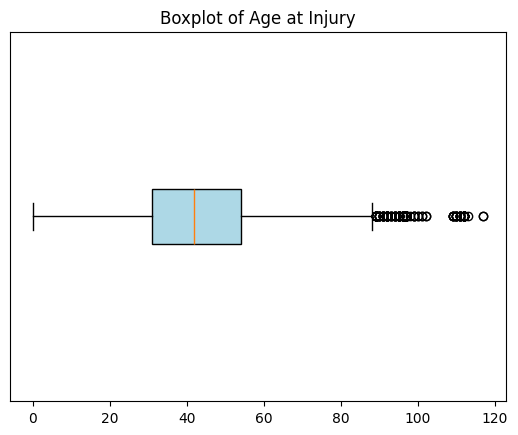

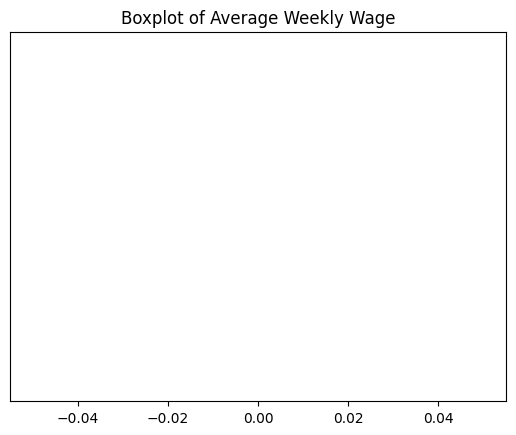

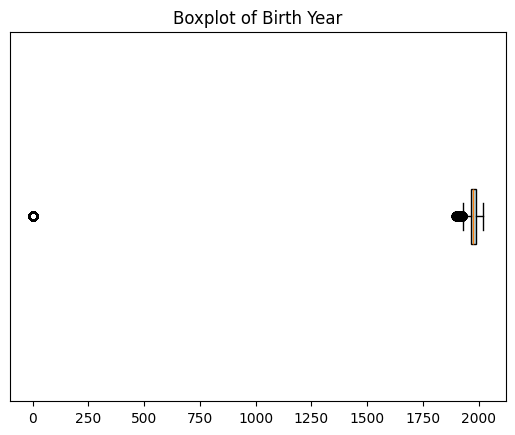

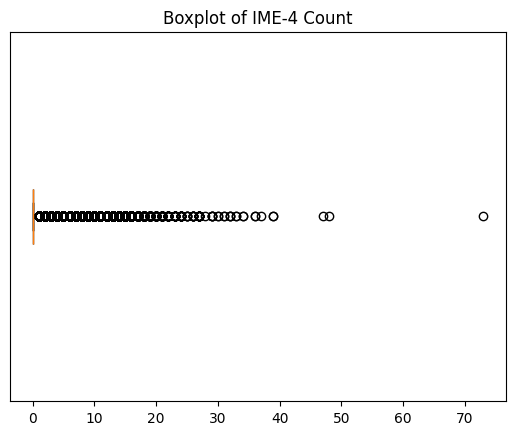

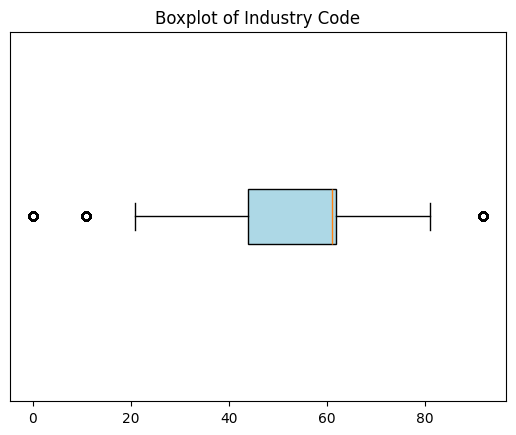

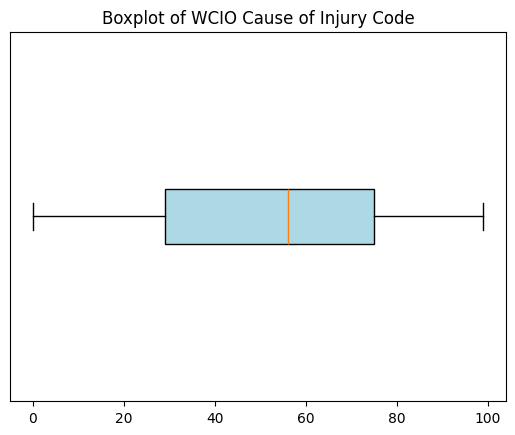

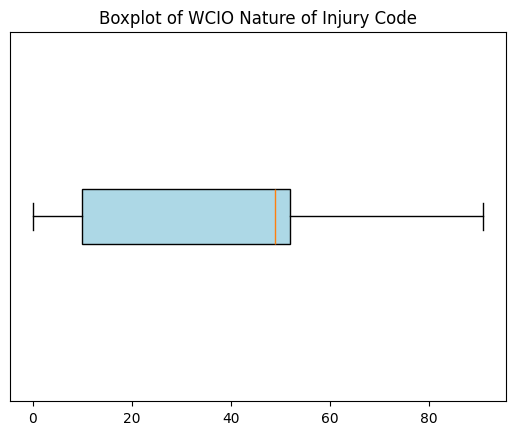

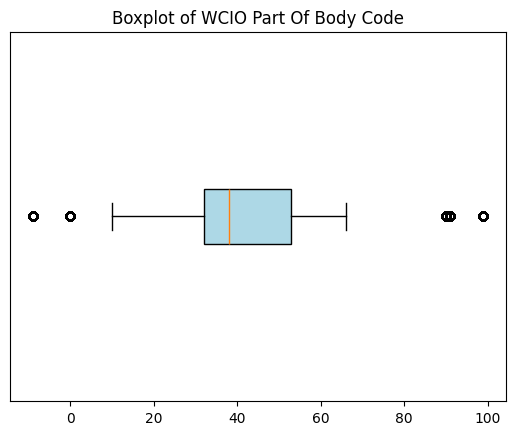

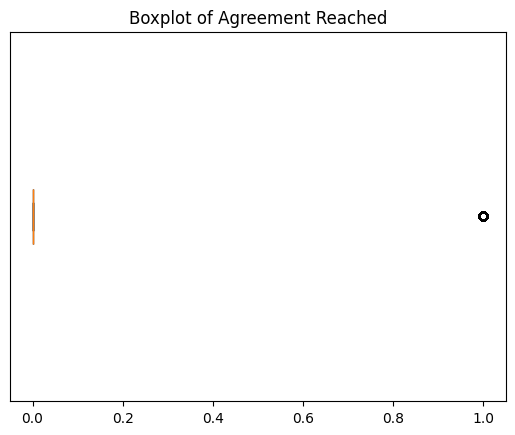

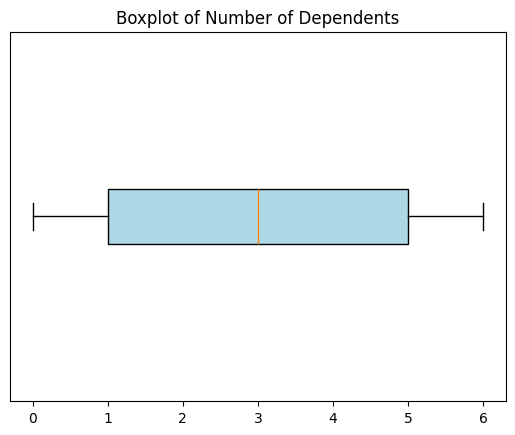

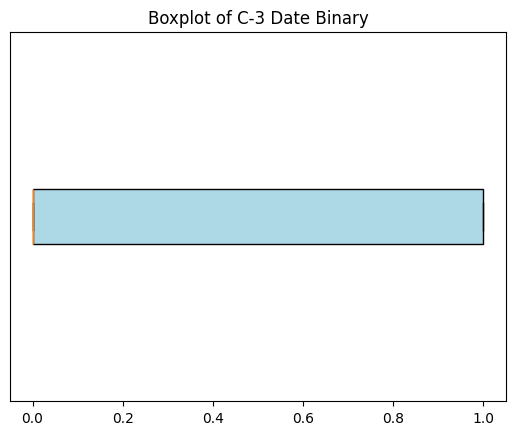

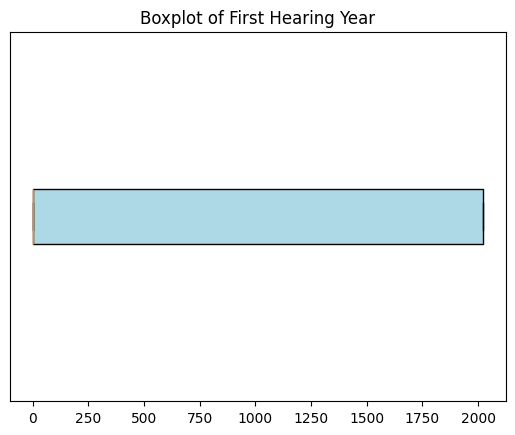

In [148]:
f.boxplots(X_train.loc[:, X_train.columns])

In [ ]:
for column in df.columns:
        if pd.api.types.is_numeric_dtype(X_train[column]):
            f.plot_histogram(df[column], 
                           xlabel=column, 
                           ylabel='Frequency', 
                           title=f'Histogram of {column}', 
                           color='lightblue')

## 2.6 Feature Engineering

<a href="#top">Top &#129033;</a>

In [ ]:
# df = df.drop('OIICS Nature of Injury Description', axis = 1)
# df = df.drop('WCB Decision', axis = 1)

**Accident Date**

transform into year (maybe month and day too)

**Age at Injury**

transform to binary

**Alternative Dispute Resolution**

encode ['N' nan 'Y' 'U'] n -> 0, y -> 1, u -> 2

**Assembly Date**

transform into year (maybe month and day too)

**Attorney/Representative**

['N' 'Y' nan] encode 0/1

**C-2 Date**

transform into year (maybe month and day too)

**Carrier Name**

too many unique values to encode, probably drop

In [78]:
df['Carrier Name'].nunique()

2046

**Carrier Type**

encode (8 unique values)

**Claim Injury Type**

encode (8 unique values)

**County of Injury**

probably too many to encode (?) --> one hot encoding

In [80]:
df['County of Injury'].nunique()

63

**COVID-19 Indicator**

binary encoding

**District Name**

encode (8 uniques)

In [79]:
df['District Name'].nunique()

8

**Gender**

encode ['M' 'F' nan 'U' 'X']

**Medical Fee Region**

encode

In [81]:
df['Medical Fee Region'].nunique()

5

In [77]:
df.head(1)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,C-3 Date Binary,First Hearing Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.0,1988.0,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaT,M,0.0,44.0,I,27.0,10.0,62.0,13662,0.0,1.0,0,0


In [ ]:
# ### NOTES

# Attorney/Representative to binary ['N' 'Y' nan]

# Alternative Dispute Resolution - encode ['N' nan 'Y' 'U'] n -> 0, y -> 1, u -> 2

# Carrier Type - encode (8 unique values)

# Claim Injury Type - encode (8 unique values)

# COVID-19 Indicator - binary ['N' nan 'Y']

# Gender - encode ['M' 'F' nan 'U' 'X']

# OIICS Nature of Injury Description - drop [nan]

# Agreement Reached - treat missing [ 0.  1. nan]

# WCB Decision - drop ['Not Work Related' nan]

# Number of Dependents - treat missing [ 1.  4.  6. nan  5.  3.  2.  0.]





TABLE WITH MEANING OF VARIABLES

# SPlit Data

# 3. Export

<a href="#top">Top &#129033;</a>

In [ ]:
#df.to_csv('./project_data/treated_data')